# Simulating null geodesics in 2D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
%matplotlib notebook

In [2]:
#setting up parameters MAKE SURE YOU DO NOT MODIFY THESE LATER ON IN THE CODE!

#all in SI
G = 6.67*10**(-11) # in SI units
M = 6*10**30 # kg idk, stereotypical mass of three solar masses i guess
c = 3*10**8 # meters/second

r = 15000 # meters
theta = 0 # radians, to start
r_s = 2*G*M/c**2 # meters
num = 200 #number of data points when plotting
timestep = 0.0000015 # seconds

In [3]:
#helpful functions for later on

#for radial
def getdr_dt(r):
    """
        Inputs: 
            r (int or float): current distance of the photon
        Outputs:
            c*(1-r_s/r) (float): returns the radial velocity of the photon in the Schwarzschild geodesic 
    """
    return c*(1-r_s/r)
def populate_r(curr_r = r, numr = num):
    """
        Inputs: 
            curr_r (int, float): starting distance of the photon
            numr (int): number of elements to fill rlist with
        Outputs:
            returns two lists; 
            rlist (List<float>): radial position of the photon's trajectory
            yvals (List<int>): equally sized y array filled with 0s
    """
    rlist = [curr_r]
    for t in range(numr):
        v = getdr_dt(curr_r)
        r_new = curr_r - v*timestep
        rlist.append(r_new)
        curr_r = r_new
        prevv = v
    yvals = [0]*len(rlist)
    return np.array(rlist), np.array(yvals)


#for orbital
def populatetheta(currtheta = theta, numvals = num, r_ = r):
    ''' 
        Inputs: 
            currtheta (int, float): starting angle of the photon
            numr (int): number of elements to fill returnlist with
        Outputs:
            returnlist (List<float>): angle in radians of the photon's trajectory at each consecutive timestep
        
    '''
    returnlist = [currtheta]
    dtheta_dt = np.sqrt(1-r_s/r_)*c/r_
    for i in range(numvals):
        newtheta = currtheta + dtheta_dt*timestep
        returnlist.append(newtheta)
        currtheta = newtheta
    return np.array(returnlist)

def polartocartesian(listtheta, r):
    # returns two arrays: one describing the position in the x axis, and the other, the y axis. 
    # x[i] corresponds to y[i] for i in len(listtheta)
    x = r*np.cos(listtheta)
    y = r*np.sin(listtheta) 
    return np.array(x), np.array(y)


#for orbital and radial
def populate_xy(startpos = (r, 0), numvals = num):
    """
        Inputs: 
            startpos (tuple<int or float, int or float>): starting position of the photon
        Output: 
            returnlist_x (np.array<float>): x coordinates of each position of the photon's trajectory
            returnlist_y (np.array<float>): y coordinates of each position of the photon's trajectory
    """
    returnlist_x = []
    returnlist_y = []
    currx = startpos[0]
    curry = startpos[1]
    for i in range(num):
        # radial contribution
        r_mag = np.sqrt(currx**2 + curry**2)
        r_hat = np.array([currx, curry])/ np.linalg.norm(np.array([currx, curry]))
        drdt = getdr_dt(r_mag)
        
        # angular contribution
        dthetadt = np.sqrt(1-r_s/r_mag)*c/r_mag
        theta = np.arctan(np.array([curry/currx]))[0]
        
        # angular velocity is always perpendicular to source of acceleration
        currx = currx + (-drdt*r_hat[0] + dthetadt*(-r_hat[1]))*timestep
        curry = curry + (-drdt*r_hat[1] + dthetadt*(r_hat[0]))*timestep
        returnlist_x.append(currx)
        returnlist_y.append(curry)
        
    return returnlist_x, returnlist_y

## Photon trajectory in the radial direction

In [4]:
#calculating r at all timesteps
rlist, yvals = populate_r(r, num)

<IPython.core.display.Javascript object>


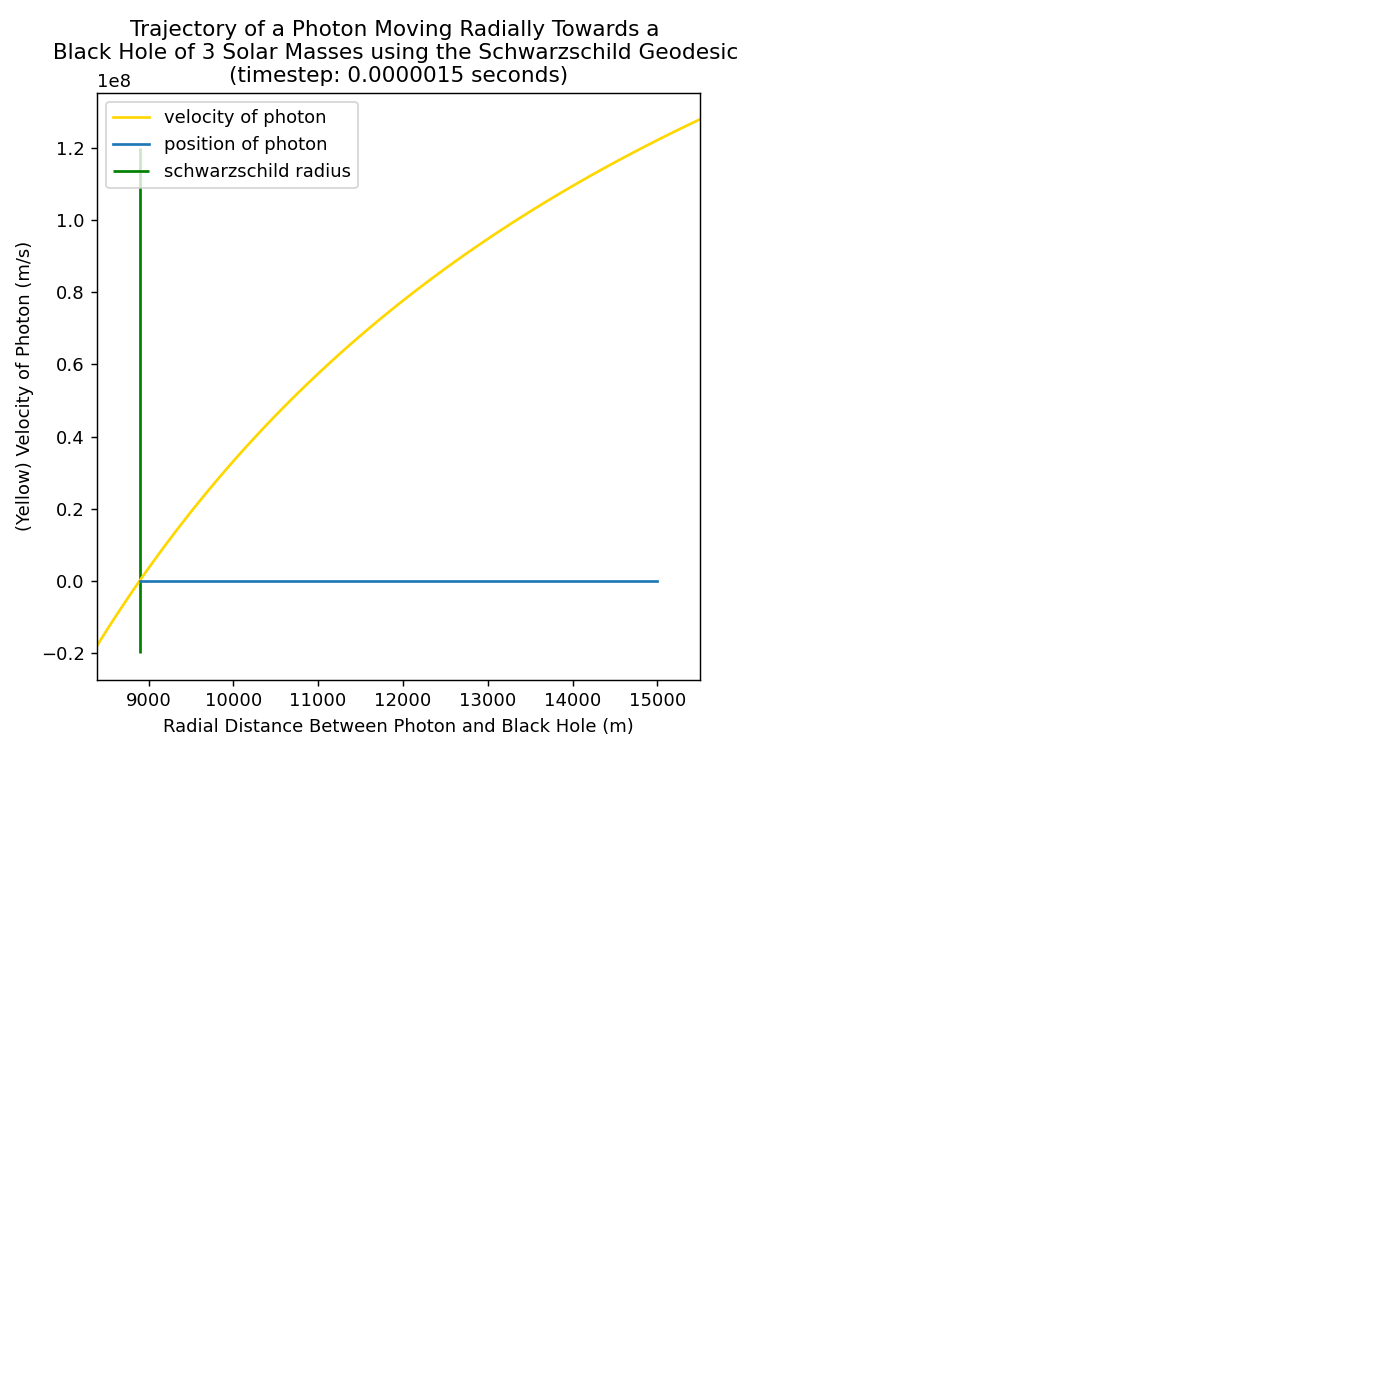

In [6]:
#plotting

fig, ax = plt.subplots()
fig.set_figheight(6)
ax.set_xlim(min(rlist) - 500, max(rlist) + 500)

rvals = np.linspace(min(rlist) - 500, max(rlist) + 500,100)
velocity =  getdr_dt(rvals)

ax.plot(rvals, velocity, label="velocity of photon", color = "gold")

ax.vlines(r_s, -2*10**7, 12*10**7, label = "schwarzschild radius", color="green")
animated_plot1, = ax.plot([],[], label="position of photon")

ax.title.set_text('Trajectory of a Photon Moving Radially Towards a \n Black Hole of 3 Solar Masses using the Schwarzschild Geodesic  \n(timestep: 0.0000015 seconds)')
ax.set_ylabel('(Yellow) Velocity of Photon (m/s)')
ax.set_xlabel("Radial Distance Between Photon and Black Hole (m)")
plt.legend()
plt.show()

#animation
def animate(frame):
    animated_plot1.set_data(rlist[:frame], yvals[:frame])
    return animated_plot1

ani = animation.FuncAnimation(fig = fig, func = animate, repeat=True,
                                    frames= len(rlist), interval=10)

## Photon trajectory in the orbital direction

In [ ]:
listtheta = populatetheta(theta, num, r)
xpos, ypos = polartocartesian(listtheta, r)

In [5]:
#circle for the schwarzschild radius
x_s, y_s = polartocartesian(np.linspace(0,2*np.pi, 100), r_s)

In [ ]:
#plotting
fig1, ax1 = plt.subplots()
fig1.set_figheight(7)
fig1.set_figwidth(8)
ax1.set_xlim(min(xpos) - 10000, max(xpos) + 10000)
ax1.set_ylim(min(ypos) - 10000, max(ypos) + 10000)
ax1.set_aspect('equal', adjustable='box')
animated_plot2, = ax1.plot([],[], label="Trajectory of photon")

ax1.title.set_text('Trajectory of a Photon Orbiting at a Constant Radius of 20000m \nAround a Black Hole of 3 Solar Masses  \n with the Schwarzschild Geodesic \n (timestep: 0.0000015 seconds)')
ax1.set_ylabel('Y position (m)')
ax1.set_xlabel("X position (m)")

ax1.plot(x_s, y_s, label="Schwarzschild Radius")

plt.legend()
plt.show()

#animation
def animate2(frame):
    animated_plot2.set_data(xpos[:frame], ypos[:frame])
    return animated_plot2
ani = animation.FuncAnimation(fig = fig, func = animate2, repeat=True,
                                    frames= len(ypos), interval=50)



## Trajectory of a Photon in Both the Radial and Orbital Direction

<IPython.core.display.Javascript object>


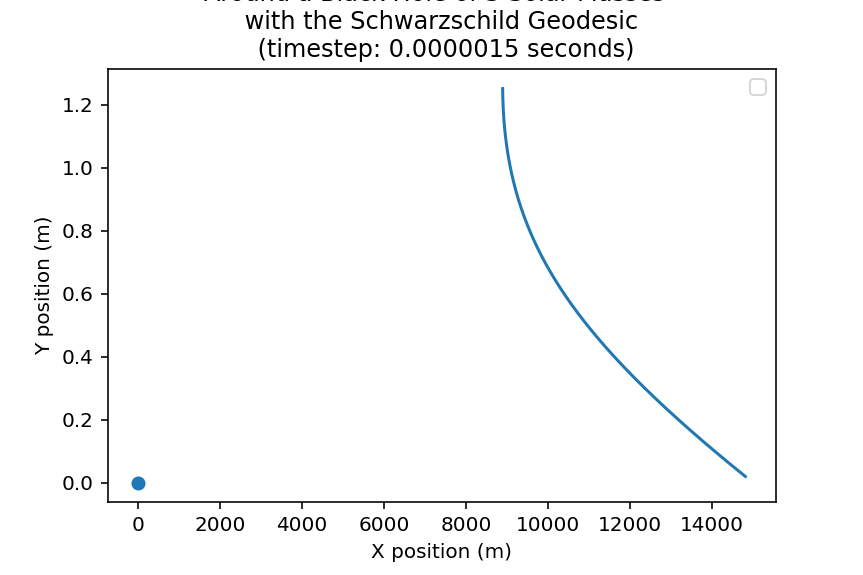

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [31]:
#plotting
x,y = populate_xy()
fig2, ax2 = plt.subplots()

# ax2.set_xlim(min(x) - 10000, max(x) + 10000)
# ax2.set_ylim(min(y) - 10000, max(y) + 10000)
# ax2.set_aspect('equal', adjustable='box')
# animated_plot3, = ax2.plot([],[], label="Trajectory of photon")

ax2.title.set_text('Trajectory of a Photon Orbiting at a Constant Radius of 20000m \nAround a Black Hole of 3 Solar Masses  \n with the Schwarzschild Geodesic \n (timestep: 0.0000015 seconds)')
ax2.set_ylabel('Y position (m)')
ax2.set_xlabel("X position (m)")

ax2.plot(x, y)
#ax2.plot(x_s, y_s, label="Schwarzschild Radius")

plt.legend()
plt.show()

# #animation
# def animate3(frame):
#     animated_plot3.set_data(x[:frame], y[:frame])
#     return animated_plot3
# ani = animation.FuncAnimation(fig = fig2, func = animate3, repeat=True,
#                                     frames= num, interval=50)


plt.scatter(0,0)

In [ ]:
np.add(np.array([1,2,3]), np.array([2,3,4]))

In [ ]:
plt.plot()